In [2]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 33.0 MB/s 


In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
import visualkeras as vk
import matplotlib.pyplot as plt
import os 
import glob
import shutil

In [4]:
url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
zip_file = tf.keras.utils.get_file(fname=url.split('/')[-1], origin=url, extract=True, )

228827136/228813984 [==============================] - 2s 0us/step


In [5]:
base_dir = os.path.join(os.path.dirname(zip_file), url.split('/')[-1].split('.')[0])

In [6]:
classes = list(os.listdir(base_dir))
if 'LICENSE.txt' in classes:
    classes.remove('LICENSE.txt')
classes

['tulips', 'sunflowers', 'dandelion', 'roses', 'daisy']

In [7]:
for cl in classes:
    img_path = os.path.join(base_dir, cl)
    images = glob.glob(img_path+'/*.jpg')
    print("{} : {} images".format(cl, len(images)))
    num_train = int(round(len(images)*0.8))
    train, val = images[:num_train], images[num_train:]

    for t in train:
        if not os.path.exists(os.path.join(base_dir, 'train', cl)):
            os.makedirs(os.path.join(base_dir, 'train', cl))
        shutil.move(t, os.path.join(base_dir, 'train', cl))
    
    for v in val:
        if not os.path.exists(os.path.join(base_dir, 'val', cl)):
            os.makedirs(os.path.join(base_dir, 'val', cl))
        shutil.move(v, os.path.join(base_dir, 'val', cl))


tulips : 799 images
sunflowers : 699 images
dandelion : 898 images
roses : 641 images
daisy : 633 images


In [8]:
train_dir = os.path.join(base_dir, 'train') 
val_dir = os.path.join(base_dir, 'val')

In [9]:
batch = 100
img_shape = 150

In [10]:
def plot_img(img_arr):
    fig, axes = plt.subplots(1,5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(img_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [11]:
image_gen_train = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range =0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=0.5
)

train_data_gen = image_gen_train.flow_from_directory(
    batch_size=batch,
    target_size=(img_shape, img_shape),
    directory=train_dir,
    shuffle=True,
    class_mode='sparse'
)

Found 2935 images belonging to 5 classes.


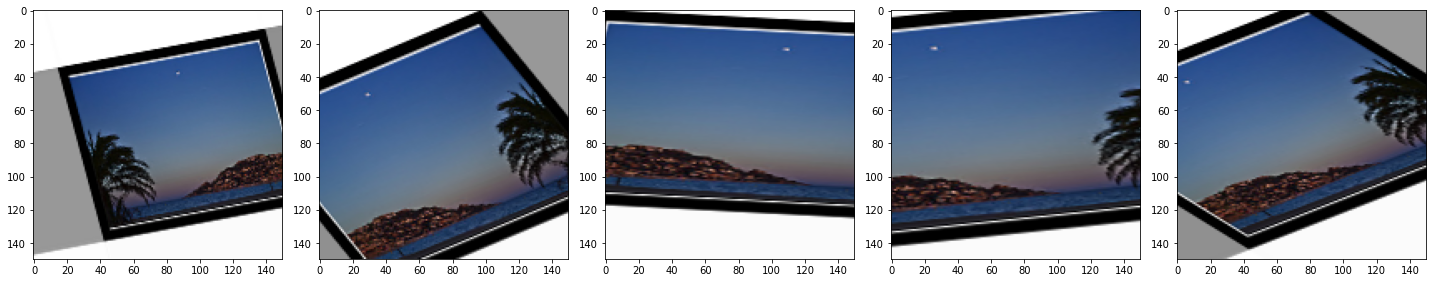

In [12]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_img(augmented_images)

In [13]:
image_gen_val = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

val_data_gen = image_gen_val.flow_from_directory(
    batch_size=batch,
    directory=val_dir,
    target_size=(img_shape, img_shape),
    class_mode='sparse'
)

Found 735 images belonging to 5 classes.


In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_shape, img_shape, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
    
])

In [15]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [16]:
epochs = 80
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = np.ceil(train_data_gen.n/batch),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=np.ceil(val_data_gen.n/batch)
    
    )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/80


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


30/30 [==============================] - 34s 755ms/step - loss: 1.5484 - accuracy: 0.3015 - val_loss: 1.3154 - val_accuracy: 0.4068
Epoch 2/80
30/30 [==============================] - 24s 791ms/step - loss: 1.2501 - accuracy: 0.4627 - val_loss: 1.1053 - val_accuracy: 0.5374
Epoch 3/80
30/30 [==============================] - 22s 745ms/step - loss: 1.1387 - accuracy: 0.5332 - val_loss: 1.0799 - val_accuracy: 0.5565
Epoch 4/80
30/30 [==============================] - 22s 743ms/step - loss: 1.0676 - accuracy: 0.5738 - val_loss: 1.0532 - val_accuracy: 0.5524
Epoch 5/80
30/30 [==============================] - 23s 774ms/step - loss: 1.0411 - accuracy: 0.5813 - val_loss: 0.9692 - val_accuracy: 0.6000
Epoch 6/80
30/30 [==============================] - 23s 769ms/step - loss: 0.9720 - accuracy: 0.6218 - val_loss: 0.9083 - val_accuracy: 0.6367
Epoch 7/80
30/30 [==============================] - 22s 740ms/step - loss: 0.9363 - accuracy: 0.6354 - val_loss: 0.9845 - val_accuracy: 0.6163
Epoch 8/80

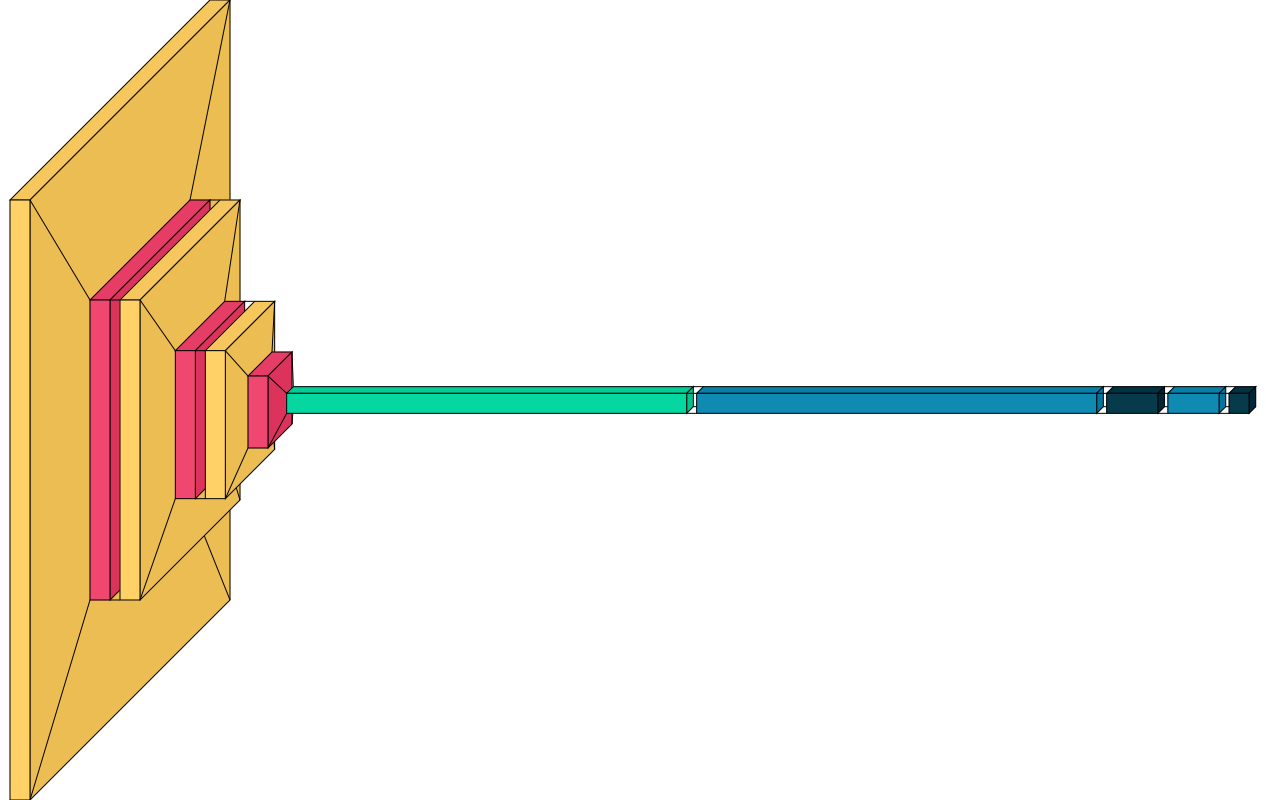

In [21]:
vk.layered_view(model)

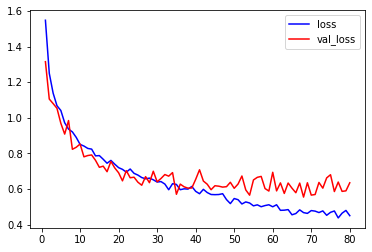

In [26]:
plt.plot(range(1,len(history.history['loss'])+1), history.history['loss'], 'b-', label='loss' )
plt.plot(range(1,len(history.history['loss'])+1), history.history['val_loss'], 'r-', label='val_loss' )
plt.legend();

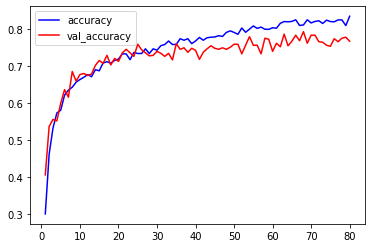

In [25]:
plt.plot(range(1,len(history.history['accuracy'])+1), history.history['accuracy'], 'b-', label='accuracy' )
plt.plot(range(1,len(history.history['accuracy'])+1), history.history['val_accuracy'], 'r-', label='val_accuracy' )
plt.legend();